In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import array
import sklearn
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use("fivethirtyeight")#for plots
import os
import warnings
warnings.filterwarnings("ignore");
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
STC=pd.read_csv('/Users/raneemalmutairi/Desktop/SDAIA/hanan/STC.csv');

In [3]:
STC.head()

,Date,Open,High,Low,Close,Change,% Change,Volume Traded
0,3/11/2012,41.4,41.7,41.2,41.6,-0.1,-0.24,487410
1,4/11/2012,41.5,41.7,41.4,41.6,0.0,0.00,447349
2,5/11/2012,41.6,41.6,41.2,41.3,-0.3,-0.72,741787
3,6/11/2012,41.4,42.1,41.3,42.1,0.8,1.94,897098
4,7/11/2012,42.1,42.4,42.0,42.3,0.2,0.48,1267367


In [4]:
STC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2269 non-null   object 
 1   Open           2269 non-null   float64
 2   High           2269 non-null   float64
 3   Low            2269 non-null   float64
 4   Close          2269 non-null   float64
 5   Change         2269 non-null   float64
 6   % Change       2269 non-null   float64
 7   Volume Traded  2269 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 141.9+ KB


In [5]:
STC.mean()

Open                 78.238938
High                 78.943764
Low                  77.543610
Close                78.294945
Change                0.030516
% Change              0.053486
Volume Traded    789583.183781
dtype: float64

In [6]:
STC.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Change           float64
% Change         float64
Volume Traded      int64
dtype: object

In [7]:
STC.Date=pd.to_datetime(STC.Date)
STC['Date'].head()

0   2012-03-11
1   2012-04-11
2   2012-05-11
3   2012-06-11
4   2012-07-11
Name: Date, dtype: datetime64[ns]

In [8]:
STC.drop(['Open','High','Low','Change','% Change','Volume Traded'], axis=1 ,inplace=True)
STC

,Date,Close
0,2012-03-11,41.6
1,2012-04-11,41.6
2,2012-05-11,41.3
3,2012-06-11,42.1
4,2012-07-11,42.3
...,...,...
2264,2021-11-24,114.0
2265,2021-11-25,113.0
2266,2021-11-28,111.6
2267,2021-11-29,111.0


<AxesSubplot:xlabel='Date'>

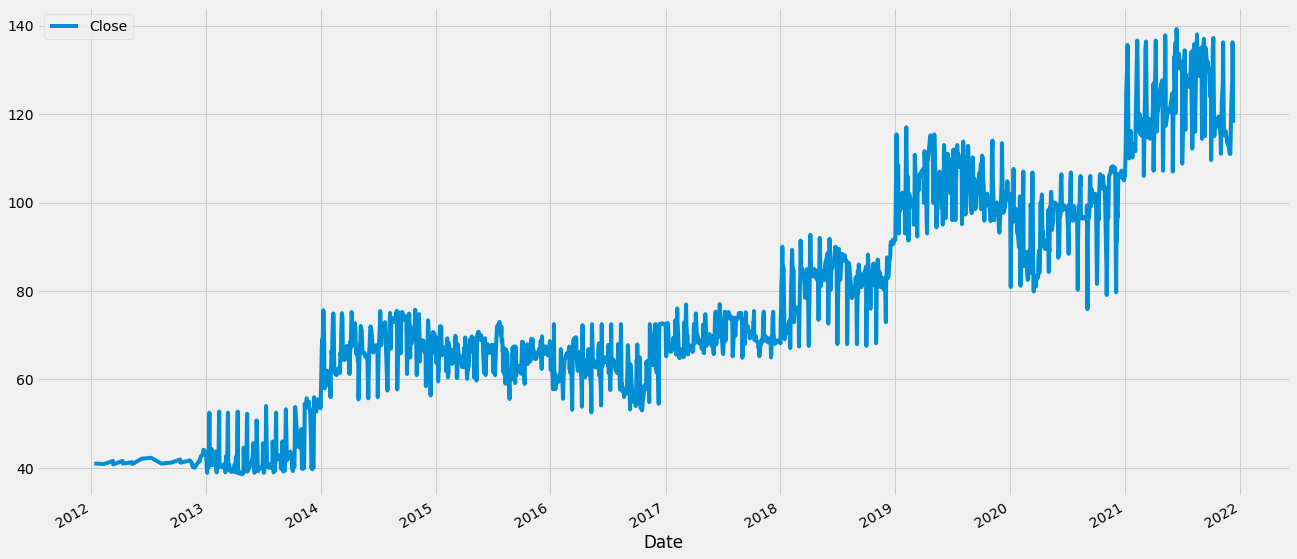

In [9]:
STC.plot(x="Date",y="Close",figsize=(20,10))


In [10]:
STC.mean()

Close    78.294945
dtype: float64

In [11]:
# NO! All are unique For each day
STC.index.is_unique


True

In [12]:
#to be organazation day by day 
STC.sort_index(ascending = True).head()


,Date,Close
0,2012-03-11,41.6
1,2012-04-11,41.6
2,2012-05-11,41.3
3,2012-06-11,42.1
4,2012-07-11,42.3


In [13]:
STC=STC.set_index('Date')
STC.head()

,Close
Date,
2012-03-11,41.6
2012-04-11,41.6
2012-05-11,41.3
2012-06-11,42.1
2012-07-11,42.3


In [14]:
# the best #of close through a month
STC_month = STC.resample('BM').mean()

STC_month

,Close
Date,
2012-01-31,41.000000
2012-02-29,40.900000
2012-03-30,41.200000
2012-04-30,41.300000
2012-05-31,41.100000
...,...
2021-08-31,129.733333
2021-09-30,128.320000
2021-10-29,119.200000


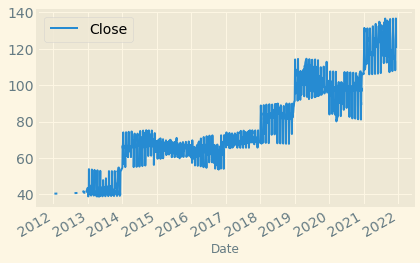

In [15]:
STC_ma =STC.rolling(window=9).mean()
STC_ma.plot(plt.style.use('Solarize_Light2')) 
figsize=(20,10)

# Train& Test

In [16]:
X = STC.values
train_size = int(len(X) * 0.90)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2269
Training Observations: 2042
Testing Observations: 227


In [17]:
STC_Train=STC[0:2042]
STC_Validate=STC[2043:2156]
STC_Test=STC[2157:2269]
print(STC_Train,STC_Validate,STC_Test)

            Close
Date             
2012-03-11   41.6
2012-04-11   41.6
2012-05-11   41.3
2012-06-11   42.1
2012-07-11   42.3
...           ...
2020-12-28  105.0
2020-12-29  106.0
2020-12-30  106.8
2020-12-31  106.0
2021-03-01  106.0

[2042 rows x 1 columns]             Close
Date             
2021-05-01  107.2
2021-06-01  107.0
2021-07-01  108.8
2021-10-01  109.6
2021-11-01  111.0
...           ...
2021-10-06  134.4
2021-06-13  139.2
2021-06-14  137.0
2021-06-15  133.8
2021-06-16  132.2

[113 rows x 1 columns]             Close
Date             
2021-06-20  132.4
2021-06-21  133.6
2021-06-22  132.8
2021-06-23  130.4
2021-06-24  131.0
...           ...
2021-11-24  114.0
2021-11-25  113.0
2021-11-28  111.6
2021-11-29  111.0
2021-11-30  111.0

[112 rows x 1 columns]


In [18]:
print(f"the size of the traing set size is ",STC_Train.shape)
print(f"the size of the validate set size is ",STC_Validate.shape)
print(f"the size of the testing set size is ",STC_Test.shape)

the size of the traing set size is  (2042, 1)
the size of the validate set size is  (113, 1)
the size of the testing set size is  (112, 1)


In [20]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(STC_Train, order=(1,0,0))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (1,0,0)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (1,0,0)
Squred error for the train 0.018829507979021436
Squred error for the validate 17.42231800441909


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(5,1,1))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (5,1,1)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (5,1,1)
Squred error for the train 0.13889581263056439
Squred error for the validate 15.455819545053687


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from statsmodels.tsa.arima.model import ARIMA
#model= ARIMA(dataFrame.columnName, order=(1,0,0)
model=ARIMA(STC_Train, order=(1,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (1,1,2)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (1,1,2)
Squred error for the train 0.1424579912793499
Squred error for the validate 15.415282358246198


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(2,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (2,1,2)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (2,1,2)
Squred error for the train 0.13380707279486817
Squred error for the validate 15.426456045249788


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(3,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (3,1,2)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (3,1,2)
Squred error for the train 0.1472954868413462
Squred error for the validate 15.423879019976736


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(0,1,0))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (0,1,0)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

The ARIMA model (0,1,0)
Squred error for the train 0.0
Squred error for the validate 15.453922376347025


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(1,1,1))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (1,1,1)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (1,1,1)
Squred error for the train 0.13377584486916638
Squred error for the validate 15.425771098948282


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(0,1,1))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print("The ARIMA model (0,1,1)")
print(f"Squred error for the train",x)
print(f"Squred error for the validate",y)

/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597

The ARIMA model (0,1,1)
Squred error for the train 0.13003639245284065
Squred error for the validate 15.442319775011327


/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/raneemalmutairi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [28]:
#we can split the time series into two contiguous sequences. 
#We can then calculate the mean and variance of each group of numbers and compare the values.
X = STC.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=59.926614, mean2=96.647093
variance1=119.746434, variance2=324.923088


In [29]:
#Running this example shows that the mean and variance values are different, but in the same ball-park^^^

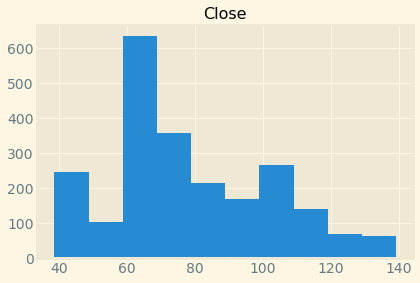

In [30]:
#Let’s check if assuming a Gaussian distribution makes sense
#in this case by plotting the values of the time series as a histogram.
from matplotlib import pyplot
STC.hist()
pyplot.show()

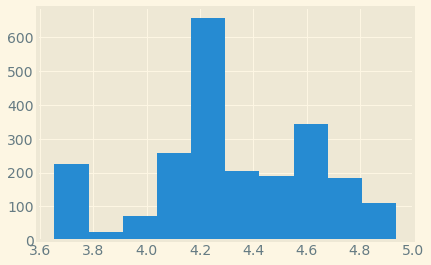

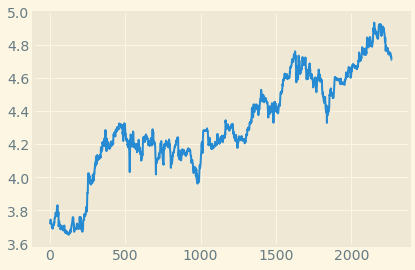

In [31]:
from numpy import log
X = STC.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [32]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [33]:
X = STC.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.073938, mean2=4.553521
variance1=0.041176, variance2=0.035384


# Facebook prophet model part

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import array
import sklearn
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use("fivethirtyeight")#for plots
import os
import warnings
warnings.filterwarnings("ignore");
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [35]:
STC=pd.read_csv('/Users/raneemalmutairi/Desktop/SDAIA/hanan/STC.csv');

In [36]:
STC

,Date,Open,High,Low,Close,Change,% Change,Volume Traded
0,3/11/2012,41.4,41.7,41.2,41.6,-0.1,-0.24,487410
1,4/11/2012,41.5,41.7,41.4,41.6,0.0,0.00,447349
2,5/11/2012,41.6,41.6,41.2,41.3,-0.3,-0.72,741787
3,6/11/2012,41.4,42.1,41.3,42.1,0.8,1.94,897098
4,7/11/2012,42.1,42.4,42.0,42.3,0.2,0.48,1267367
...,...,...,...,...,...,...,...,...
2264,24/11/2021,113.8,114.6,113.0,114.0,0.8,0.71,934866
2265,25/11/2021,114.0,115.0,113.0,113.0,-1.0,-0.88,751470
2266,28/11/2021,110.0,111.8,110.0,111.6,-1.4,-1.24,1021011
2267,29/11/2021,111.6,113.0,111.0,111.0,-0.6,-0.54,889423


In [37]:
STC = STC[["Date","Close"]] # select Date and close
# Rename the features: These names are NEEDED for the model fitting
STC = STC.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
STC.head(5)

,ds,y
0,3/11/2012,41.6
1,4/11/2012,41.6
2,5/11/2012,41.3
3,6/11/2012,42.1
4,7/11/2012,42.3


In [38]:
from fbprophet import Prophet
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(STC) # fit the model using all data

Initial log joint probability = -8.66821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5570.95       0.07298       963.789           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5745.36     0.0222001       2389.05           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5802.43     0.0168862       902.095           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5830.2     0.0106326       795.706           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5844.37    0.00529205       861.256           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [39]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(STC);


Initial log joint probability = -8.66821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5570.95       0.07298       963.789           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5745.36     0.0222001       2389.05           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5802.43     0.0168862       902.095           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5830.2     0.0106326       795.706           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5844.37    0.00529205       861.256           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

# using the m modeel and make future function will get predections with a freqency of d which is daily

In [40]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-12,40.449349,31.281843,52.451021,40.449349,40.449349,1.256603,1.256603,1.256603,-1.167433,...,-0.052687,-0.052687,-0.052687,2.476723,2.476723,2.476723,0.0,0.0,0.0,41.705953
1,2012-02-12,40.520321,30.655877,51.885059,40.520321,40.520321,0.748848,0.748848,0.748848,-1.167433,...,0.101453,0.101453,0.101453,1.814828,1.814828,1.814828,0.0,0.0,0.0,41.269170
2,2012-03-11,40.584425,30.493264,51.701692,40.584425,40.584425,0.394112,0.394112,0.394112,-1.167433,...,0.101453,0.101453,0.101453,1.460092,1.460092,1.460092,0.0,0.0,0.0,40.978537
3,2012-03-12,40.586715,28.963115,52.197062,40.586715,40.586715,0.265101,0.265101,0.265101,-1.167433,...,-0.024411,-0.024411,-0.024411,1.456944,1.456944,1.456944,0.0,0.0,0.0,40.851816
4,2012-04-11,40.655397,31.458545,51.573778,40.655397,40.655397,0.719632,0.719632,0.719632,-1.167433,...,0.298904,0.298904,0.298904,1.588161,1.588161,1.588161,0.0,0.0,0.0,41.375029


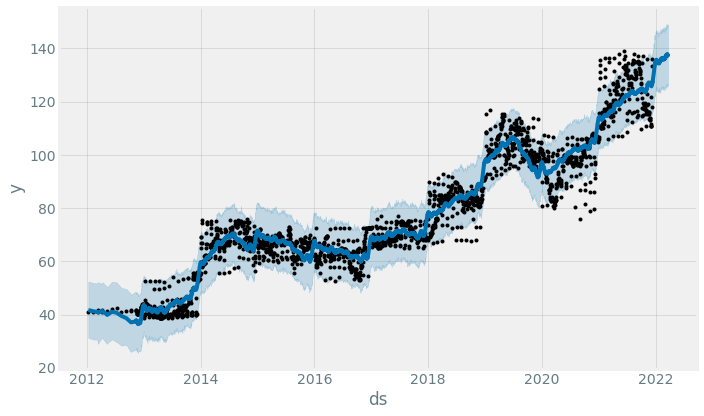

In [41]:
plot1 = m.plot(forecast)


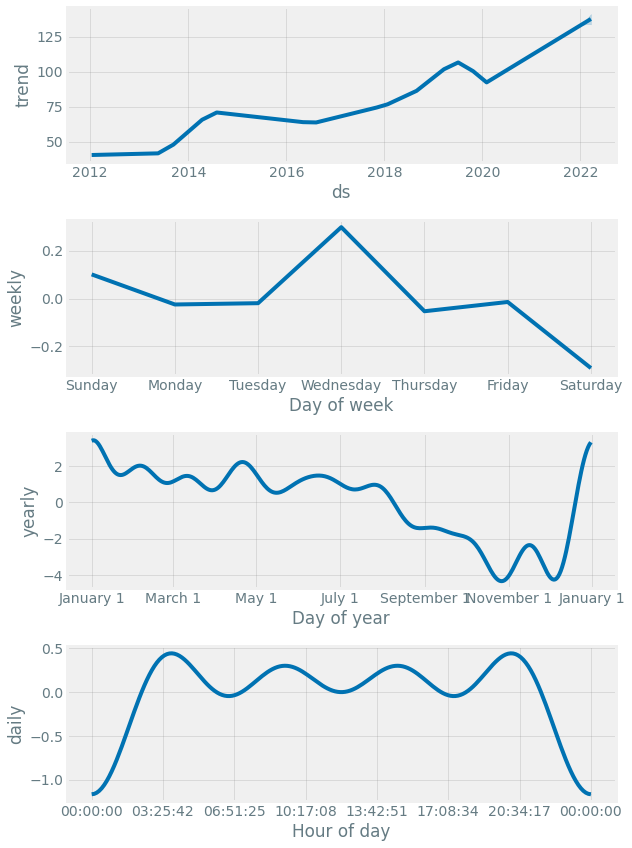

In [42]:
plt2 = m.plot_components(forecast)



# using the m modeel and make future function will get predections with a freqency of d which is monthly

In [43]:
future = m.make_future_dataframe(periods=100,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-12,40.449349,30.663945,52.371750,40.449349,40.449349,1.256603,1.256603,1.256603,-1.167433,...,-0.052687,-0.052687,-0.052687,2.476723,2.476723,2.476723,0.0,0.0,0.0,41.705953
1,2012-02-12,40.520321,30.150939,51.886995,40.520321,40.520321,0.748848,0.748848,0.748848,-1.167433,...,0.101453,0.101453,0.101453,1.814828,1.814828,1.814828,0.0,0.0,0.0,41.269170
2,2012-03-11,40.584425,30.243393,51.420617,40.584425,40.584425,0.394112,0.394112,0.394112,-1.167433,...,0.101453,0.101453,0.101453,1.460092,1.460092,1.460092,0.0,0.0,0.0,40.978537
3,2012-03-12,40.586715,29.875285,51.791388,40.586715,40.586715,0.265101,0.265101,0.265101,-1.167433,...,-0.024411,-0.024411,-0.024411,1.456944,1.456944,1.456944,0.0,0.0,0.0,40.851816
4,2012-04-11,40.655397,31.270694,52.204334,40.655397,40.655397,0.719632,0.719632,0.719632,-1.167433,...,0.298904,0.298904,0.298904,1.588161,1.588161,1.588161,0.0,0.0,0.0,41.375029


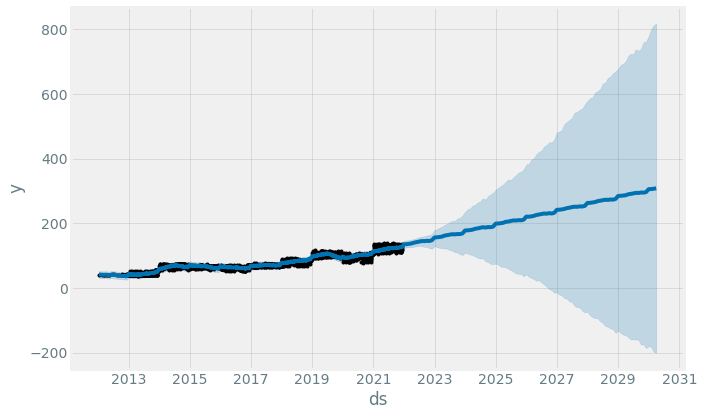

In [44]:
plot1 = m.plot(forecast)


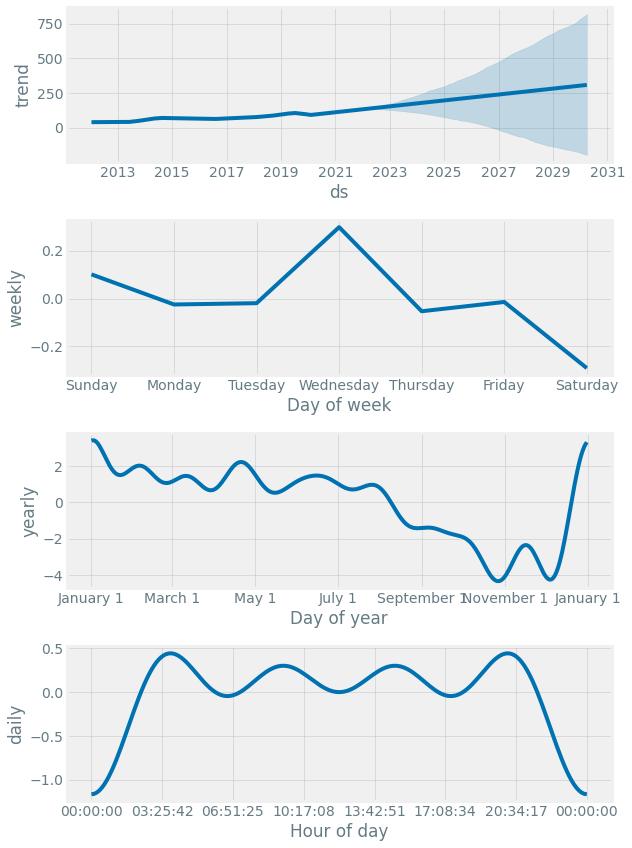

In [45]:
plt2 = m.plot_components(forecast)


# # using the m modeel and make future function will get predections with a freqency of d which is yearly


In [46]:
future = m.make_future_dataframe(periods=100,freq='Y')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-12,40.449349,29.990183,53.227532,40.449349,40.449349,1.256603,1.256603,1.256603,-1.167433,...,-0.052687,-0.052687,-0.052687,2.476723,2.476723,2.476723,0.0,0.0,0.0,41.705953
1,2012-02-12,40.520321,30.550503,50.982290,40.520321,40.520321,0.748848,0.748848,0.748848,-1.167433,...,0.101453,0.101453,0.101453,1.814828,1.814828,1.814828,0.0,0.0,0.0,41.269170
2,2012-03-11,40.584425,29.778305,50.859597,40.584425,40.584425,0.394112,0.394112,0.394112,-1.167433,...,0.101453,0.101453,0.101453,1.460092,1.460092,1.460092,0.0,0.0,0.0,40.978537
3,2012-03-12,40.586715,30.556716,51.889497,40.586715,40.586715,0.265101,0.265101,0.265101,-1.167433,...,-0.024411,-0.024411,-0.024411,1.456944,1.456944,1.456944,0.0,0.0,0.0,40.851816
4,2012-04-11,40.655397,31.037992,52.446752,40.655397,40.655397,0.719632,0.719632,0.719632,-1.167433,...,0.298904,0.298904,0.298904,1.588161,1.588161,1.588161,0.0,0.0,0.0,41.375029


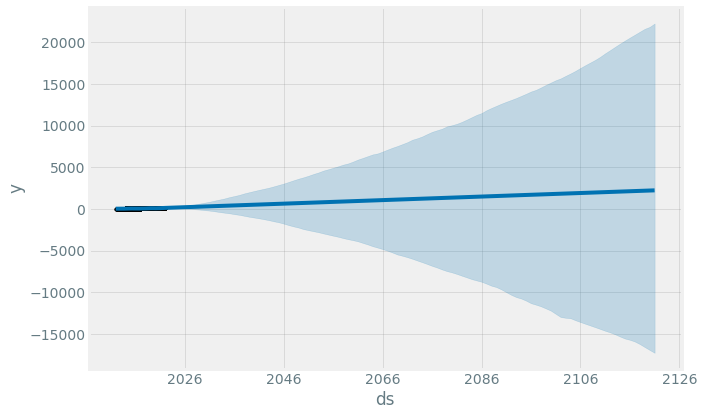

In [47]:
plot1 = m.plot(forecast)


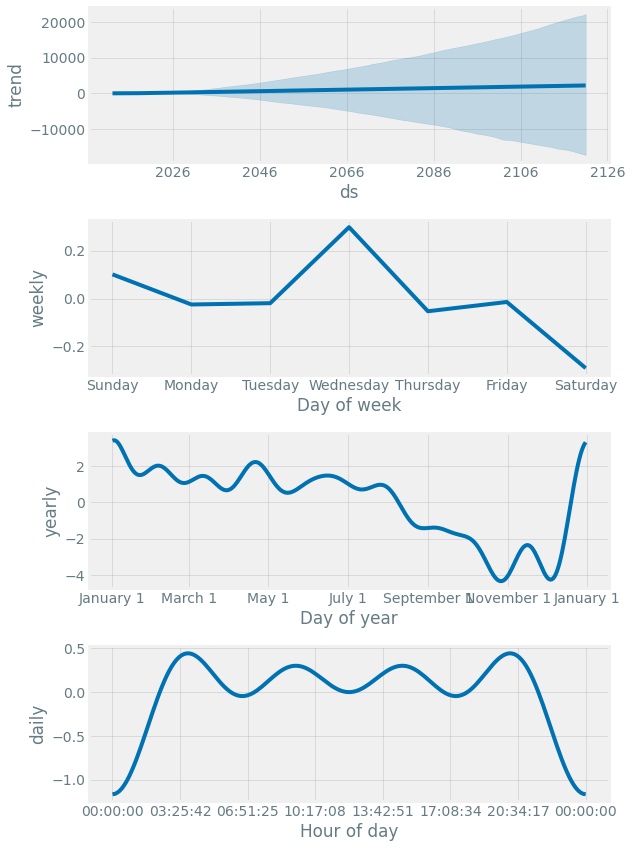

In [48]:
plt2 = m.plot_components(forecast)
#weekly=["Sunday","Monday","Tuesday","Wensday","Thursday"];

In [49]:
forecast [['ds','yhat']]

,ds,yhat
0,2012-01-12,41.705953
1,2012-02-12,41.269170
2,2012-03-11,40.978537
3,2012-03-12,40.851816
4,2012-04-11,41.375029
...,...,...
2364,2116-12-31,2158.678427
2365,2117-12-31,2179.972702
2366,2118-12-31,2200.949270
2367,2119-12-31,2222.591621


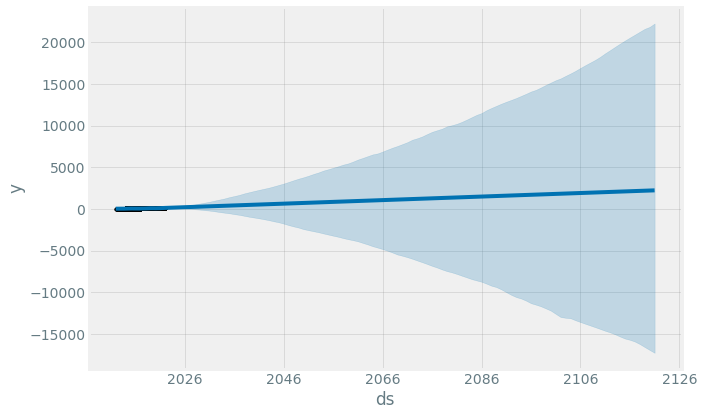

In [50]:
plt5= m.plot(forecast)
